# [Dicoding Submission] Predictive Analytics - M Radya Fariez

# 1) Import Library

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# 2) Import Dataset from Directory

In [37]:
df = pd.read_csv('Used_Car_Datasets.csv')

# 3) Collect Data Info

In [38]:
df.info()
# Info Statistik
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


Collect Possible NaN Info
* Output menunjukkan tidak ada data yang kosong (NaN)

In [39]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

* Menghilangkan kolom fitur yang tidak berkaitan dengan target
* Showing data head after drop column

In [40]:
df = df.drop(['name'], axis = 'columns')

# Setelah drop column
df.head(6)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,2007,140000,125000,Petrol,Individual,Manual,First Owner


# 4) Univariate Analysis

In [41]:
numerical_features = ['year', 'selling_price', 'km_driven']
categorical_features = ['fuel', 'seller_type', 'transmission','owner']

* Analisa kategori pada fitur

In [42]:
df.groupby('fuel')['fuel'].agg('count')

fuel
CNG           40
Diesel      2153
Electric       1
LPG           23
Petrol      2123
Name: fuel, dtype: int64

In [43]:
df.groupby('seller_type')['seller_type'].agg('count')

seller_type
Dealer               994
Individual          3244
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [44]:
df.groupby('transmission')['transmission'].agg('count')

transmission
Automatic     448
Manual       3892
Name: transmission, dtype: int64

In [45]:
df.groupby('owner')['owner'].agg('count')

owner
First Owner             2832
Fourth & Above Owner      81
Second Owner            1106
Test Drive Car            17
Third Owner              304
Name: owner, dtype: int64

* Numerical feature and label statistics

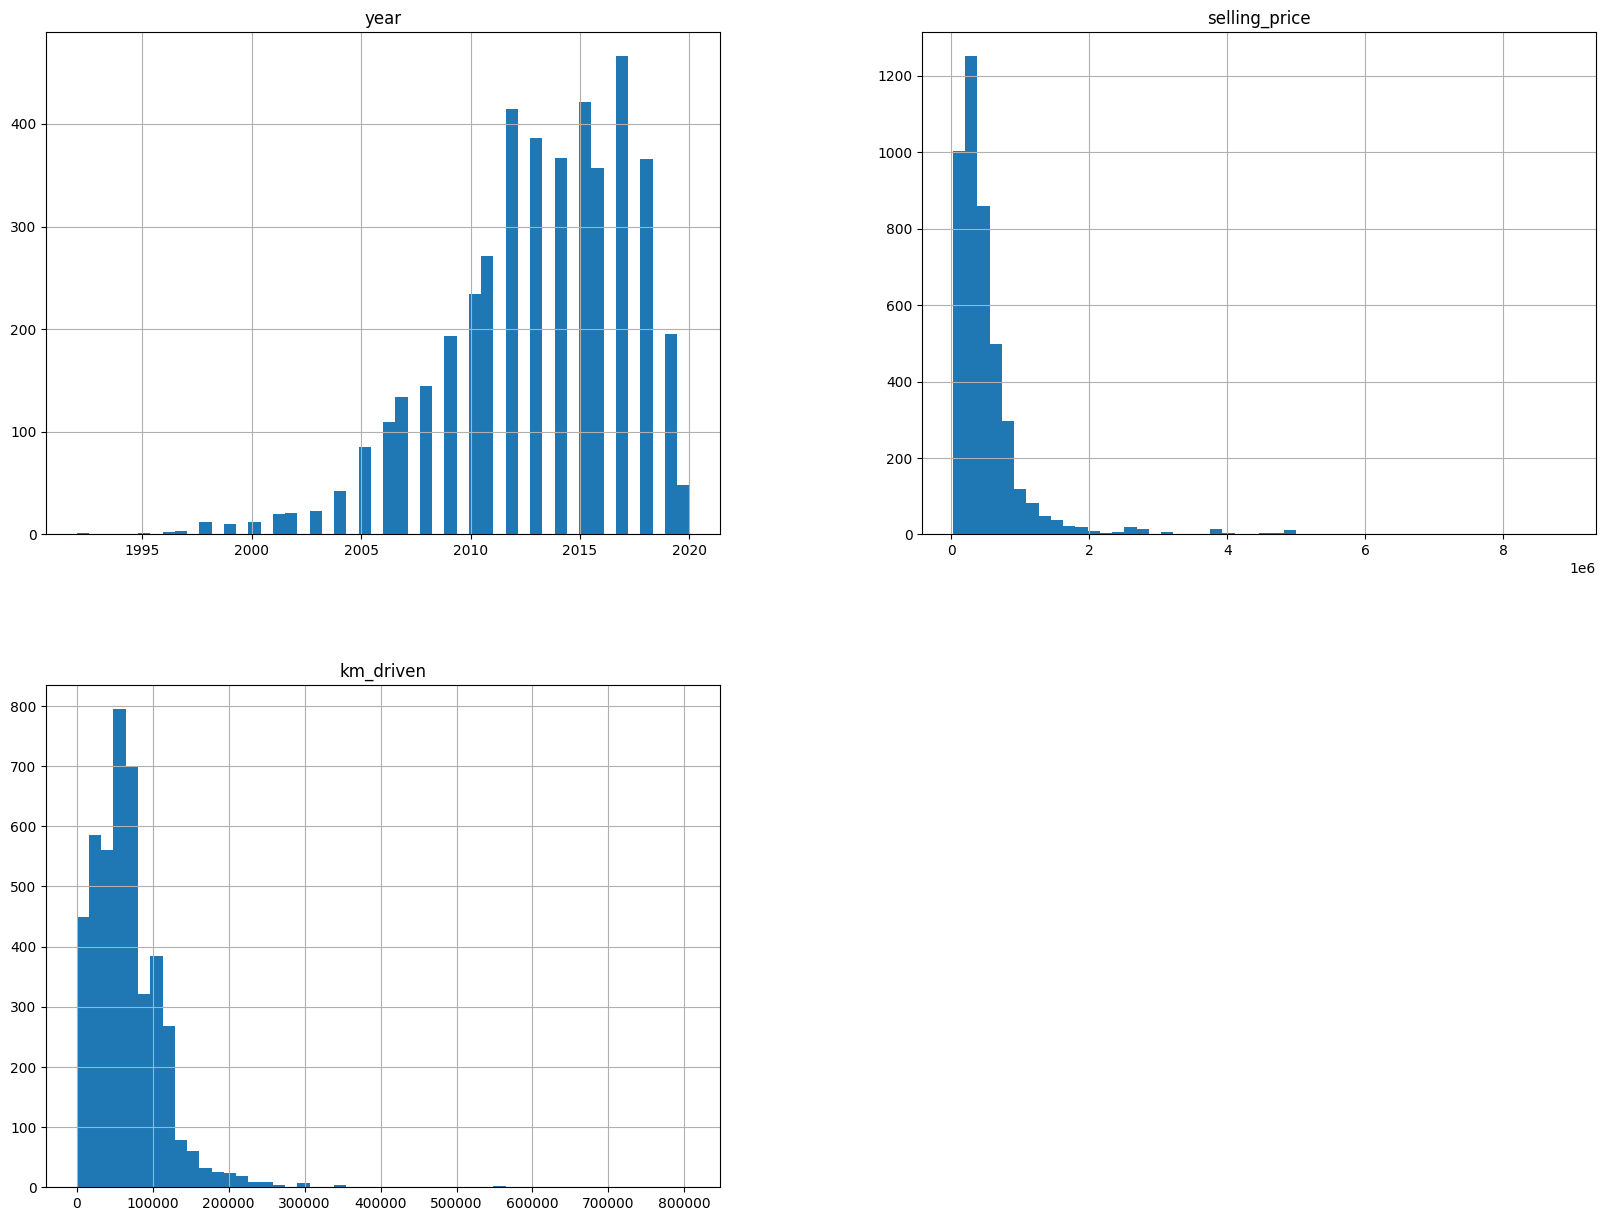

In [46]:
df.hist(bins=50, figsize=(20,15))
plt.show()

# 5) Multivariate Analysis

* Mengamati hubungan antar fitur numerik dengan fungsi pairplot()

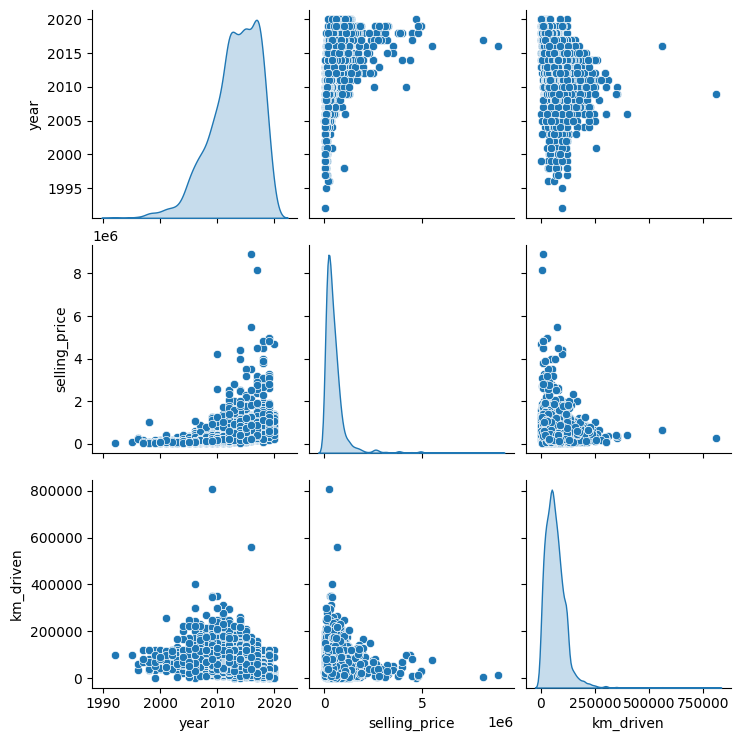

In [47]:
sns.pairplot(df, diag_kind = 'kde')

* Evaluasi skor korelasi fitur numerik dengan fitur target

In [48]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

C:\Users\MOHAMMADFARIEZ\AppData\Local\Temp\ipykernel_9692\1475961330.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


<Figure size 1000x800 with 0 Axes>

* Untuk print nilai di dalam kotak, gunakan parameter annot=True

Text(0.5, 1.0, 'Korelasi Matriks untuk Fitur Numerik ')

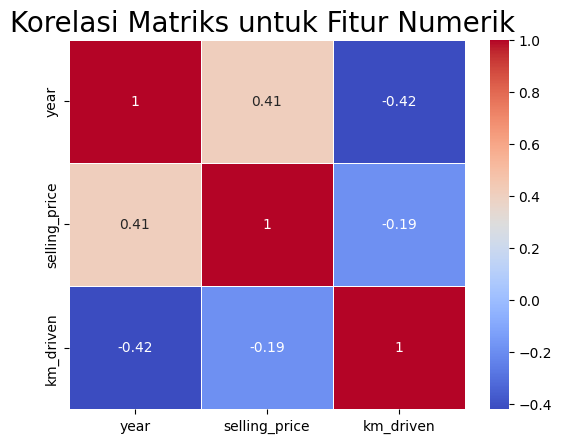

In [49]:
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Korelasi Matriks untuk Fitur Numerik ", size=20)

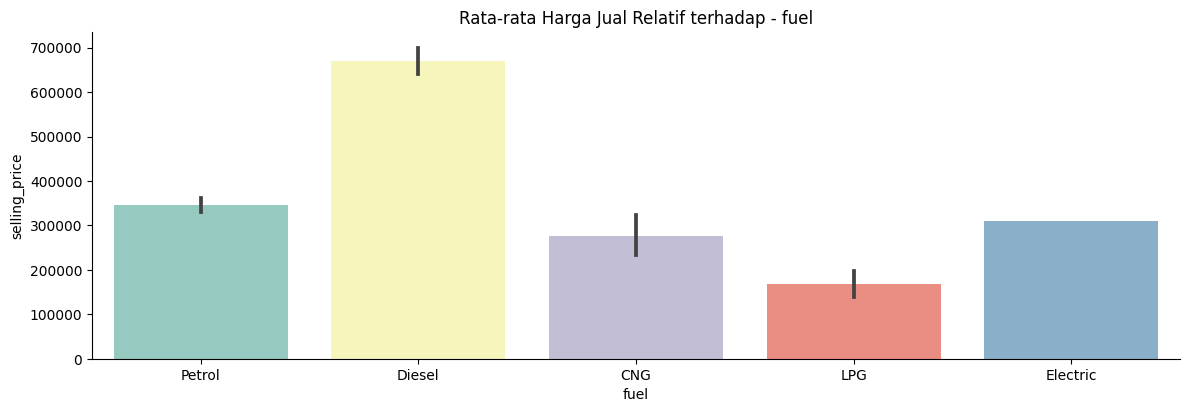

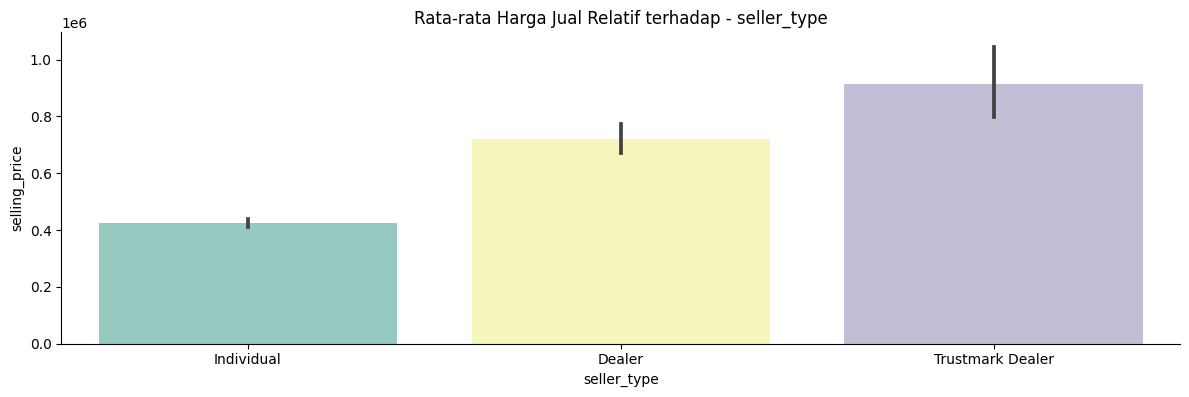

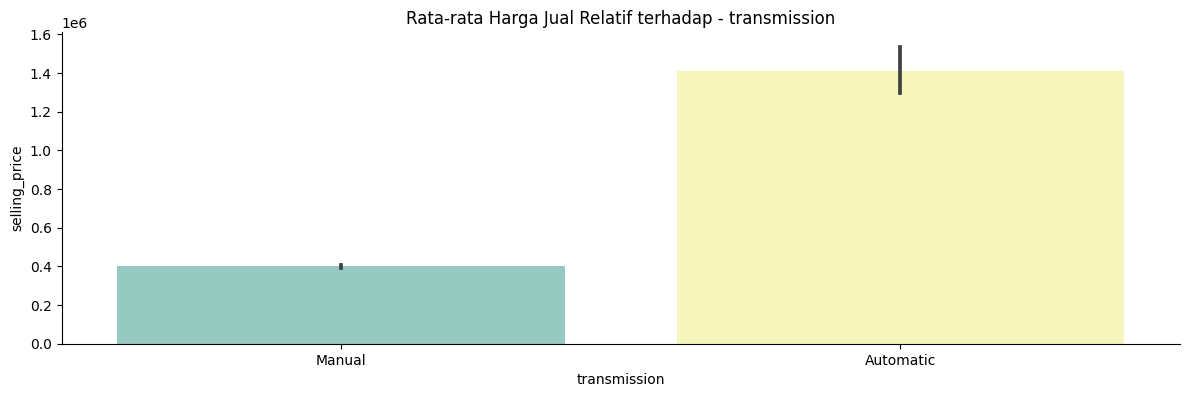

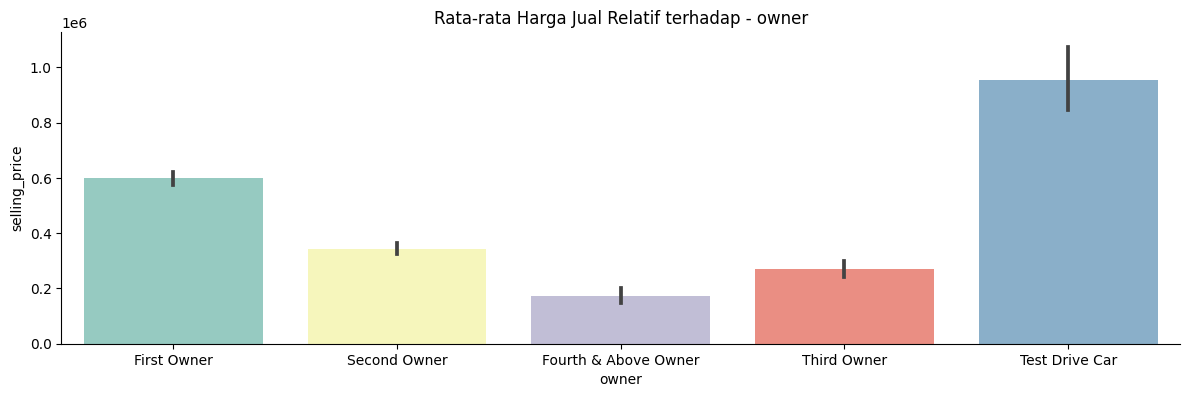

In [50]:
# Melihat kolerasi antara fitur kategorik dengan fitur target (harga)
cat_features = df.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="selling_price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata Harga Jual Relatif terhadap - {}".format(col))

* Categorical -> One Hot Encoding

In [51]:
from sklearn.preprocessing import  OneHotEncoder

df = pd.concat([df, pd.get_dummies(df['fuel'], prefix='fuel')],axis=1)
df = pd.concat([df, pd.get_dummies(df['seller_type'], prefix='seller_type')],axis=1)
df = pd.concat([df, pd.get_dummies(df['transmission'], prefix='transmission')],axis=1)
df = pd.concat([df, pd.get_dummies(df['owner'], prefix='owner')],axis=1)

df.drop(['fuel','seller_type','transmission','owner'], axis=1, inplace=True)

In [52]:
df

,year,selling_price,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
1,2007,135000,50000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
2,2012,600000,100000,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
3,2017,250000,46000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,2014,450000,141000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4336,2014,409999,80000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4337,2009,110000,83000,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
4338,2016,865000,90000,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0


# 6) Data Preparation

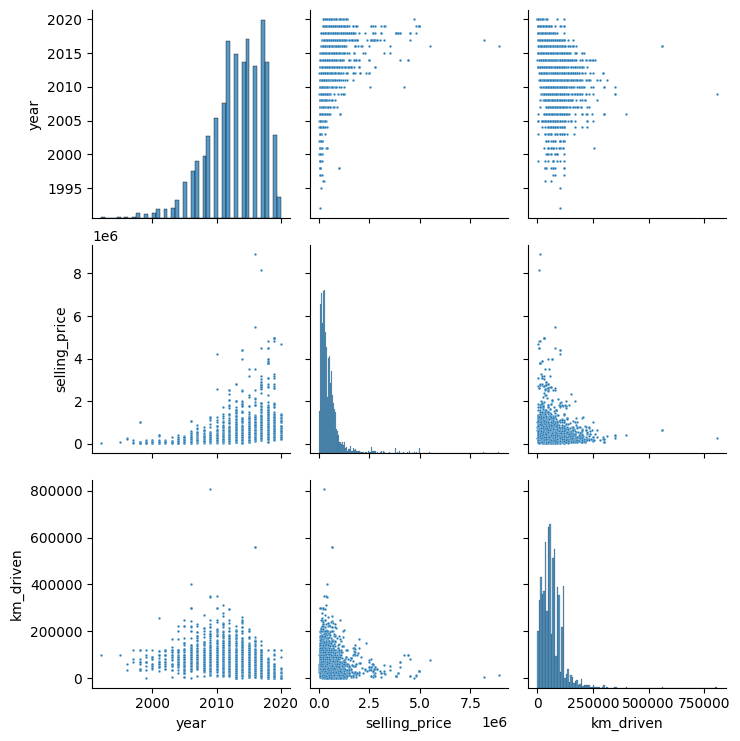

In [53]:
sns.pairplot(df[['year','selling_price','km_driven']], plot_kws={"s": 3});

In [54]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=3, random_state=123)
pca.fit(df[['year','selling_price','km_driven']])
princ_comp = pca.transform(df[['year','selling_price','km_driven']])

# Proporsi informasi tiap komponen
pca.explained_variance_ratio_.round(3)

array([0.994, 0.006, 0.   ])

In [55]:
from sklearn.model_selection import train_test_split
 
X = df.drop(["selling_price"],axis =1)
y = df["selling_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=123)

In [56]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 4340
Total # of sample in train dataset: 3906
Total # of sample in test dataset: 434


* Normalisasi menggunakan StandardScaler

In [57]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['year', 'km_driven']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features]

,year,km_driven
3808,1.160330,-0.072820
4308,1.160330,-0.668052
1373,0.686815,-0.604277
2767,-2.154275,0.075988
2243,0.686815,-1.261073
...,...,...
1593,0.686815,-0.561761
4060,0.213300,0.713736
1346,-0.733730,0.713736
3454,0.923573,0.926319


* Mengecek mean dan standar deviasi

In [58]:
X_train[numerical_features].describe().round(4)

,year,km_driven
count,3906.0000,3906.0000
mean,-0.0000,0.0000
std,1.0001,1.0001
min,-4.9954,-1.4121
25%,-0.4970,-0.6681
50%,0.2133,-0.1366
75%,0.6868,0.5012
max,1.6338,15.7348


# 7) Model Development

* Menyiapkan dataframe untuk analisis model

In [59]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

* KNN Model Deployment

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
 
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

* Random Forest Model Deployment

In [61]:
from sklearn.ensemble import RandomForestRegressor
 
# Membuat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)    

* Boosting Algorithm Model

In [62]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

* Scalling process

In [63]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [64]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

* Hitung Mean Squared Error masing-masing algoritma pada data train dan test

In [65]:
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# 8) Evaluation

* Showing Mean Squared Error

In [66]:
mse

,train,test
KNN,90571408.006381,249200473.92627
RF,25508089.709651,238771672.382782
Boosting,129113213.176645,270278743.29991


* Menunjukkan nilai error

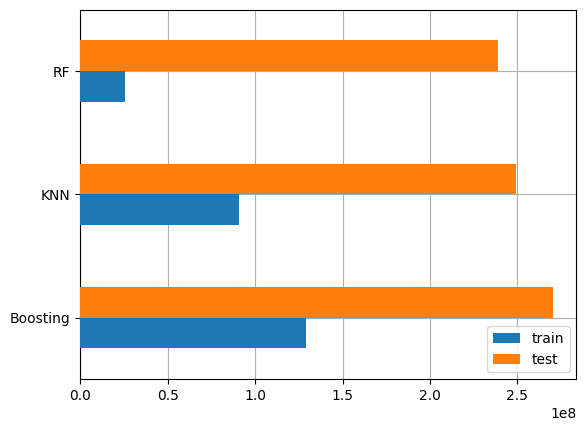

In [67]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

* Menunjukkan nilai prediksi hasil dari 3 model yang paling mendekati dengan y_test

In [68]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

C:\Users\MOHAMMADFARIEZ\AppData\Local\Temp\ipykernel_9692\1866324682.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  pred_dict = {'y_true':y_test[:1]}


,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
527,2750000,2154166.7,2307842.9,1914371.6
